[CS983- Group 1]
[SUMMARY]
Steps for processing and classifying the temperature and humidity data:

1. Load the Dataset: Read the dataset from the CSV file into a DataFrame.
2. Convert 'DATETIME' to DateTime Object: Convert the 'DATETIME' column to a datetime object and extract the date.
3. Group by Date: Group the data by date and calculate the average temperature and humidity for each day.
4. Classify Each Day: Define a function to classify each day based on the temperature and humidity criteria.
5. Apply Classification: Apply the classification function to the grouped data.
6. Plot the average daily temperature and humidity over time.
7. Plot the count of each classification category.

Step 1: Load the Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from matplotlib.colors import ListedColormap, BoundaryNorm
import calplot
import warnings
import numpy as np
import calendar
# Load the dataset
file_path = './Temp_and_humidity_dataset.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataset to understand its structure
data.head()

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0


Step 2: Convert 'DATETIME' to DateTime Object and Extract Date

Check if DATETIME column is in the expected datetime format

In [4]:
# Check if DATETIME column is in the expected datetime format
def check_datetime_format(df):
    try:
        df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%Y-%m-%d %H:%M:%S')
        print("DATETIME column is in the correct format.")
    except Exception as e:
        print(f"Error with DATETIME column format: {e}")

In [5]:
# Run the checks
check_datetime_format(data)

DATETIME column is in the correct format.


In [6]:
# Convert 'DATETIME' to datetime object and extract date
data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data['DATE'] = data['DATETIME'].dt.date


Check TEMPERATURE and HUMIDITY for numeric values (float)

In [7]:
# Check TEMPERATURE and HUMIDITY for numeric values (float)
def check_numeric_values(df, columns):
    for column in columns:
        if not pd.api.types.is_numeric_dtype(df[column]):
            print(f"Warning: {column} column does not contain numeric values. Checking for any non-numeric values...")
            non_numeric_values = df[~df[column].apply(pd.to_numeric, errors='coerce').notnull()]
            if not non_numeric_values.empty:
                print(f"Non-numeric values found in {column}:")
                print(non_numeric_values[column].unique())
        else:
            print(f"{column} column contains numeric values.")

In [8]:
# Run the checks
check_numeric_values(data, ['TEMPERATURE', 'HUMIDITY'])

TEMPERATURE column contains numeric values.
HUMIDITY column contains numeric values.


Step 3: Group by Date and Calculate Average Temperature and Humidity

In [9]:
# Group by date and calculate average temperature and humidity
daily_data = data.groupby('DATE').agg({'TEMPERATURE': 'mean', 'HUMIDITY': 'mean'}).reset_index()

Step 4: Define a Function to Classify Each Day

In [10]:
# Define a function to classify each day based on the criteria
def classify_day(row):
    if row['TEMPERATURE'] > 30 and row['HUMIDITY'] <= 70:
        return 'Hot'
    elif row['TEMPERATURE'] > 30 and row['HUMIDITY'] > 70:
        return 'Hot and Humid'
    elif row['TEMPERATURE'] <= 30 and row['HUMIDITY'] > 30:
        return 'Cold'
    else:
        return 'Cold and Dry'# Define a function to classify each day based on the criteria

def classify_day_heatmap(row):
    if row['TEMPERATURE'] > 30 and row['HUMIDITY'] <= 70:
        return 3  # Hot
    elif row['TEMPERATURE'] > 30 and row['HUMIDITY'] > 70:
        return 4  # Hot and Humid
    elif row['TEMPERATURE'] <= 30 and row['HUMIDITY'] > 30:
        return 2  # Cold
    else:
        return 1  # Cold and Dry

Step 5: Apply the Classification Function

In [11]:
# Group by date and calculate average temperature and humidity
#daily_data = data.groupby('DATE').agg({'TEMPERATURE': 'mean', 'HUMIDITY': 'mean'}).reset_index()
# Apply the classification function to each row
daily_data['CLASSIFICATION'] = daily_data.apply(classify_day, axis=1)

# Save the DataFrame to a CSV file
csv_filename = 'daily_data_with_classification.csv'
daily_data.to_csv(csv_filename, index=False)

# Set display option to show all rows
#pd.set_option('display.max_rows', None)

# Set display option to show 15 rows
pd.set_option('display.max_rows', 15)

# Display the DataFrame
display(daily_data)

,DATE,TEMPERATURE,HUMIDITY,CLASSIFICATION
0,2015-01-01,20.333333,83.208333,Cold
1,2015-01-02,23.041667,76.250000,Cold
2,2015-01-03,24.375000,76.750000,Cold
3,2015-01-04,23.916667,68.250000,Cold
4,2015-01-05,21.250000,51.375000,Cold
...,...,...,...,...
2187,2020-12-27,23.083333,28.583333,Cold and Dry
2188,2020-12-28,23.958333,30.250000,Cold
2189,2020-12-29,24.750000,32.458333,Cold
2190,2020-12-30,23.875000,34.125000,Cold


Step 6: Draw a plot to show the average daily temperature and humidity over time

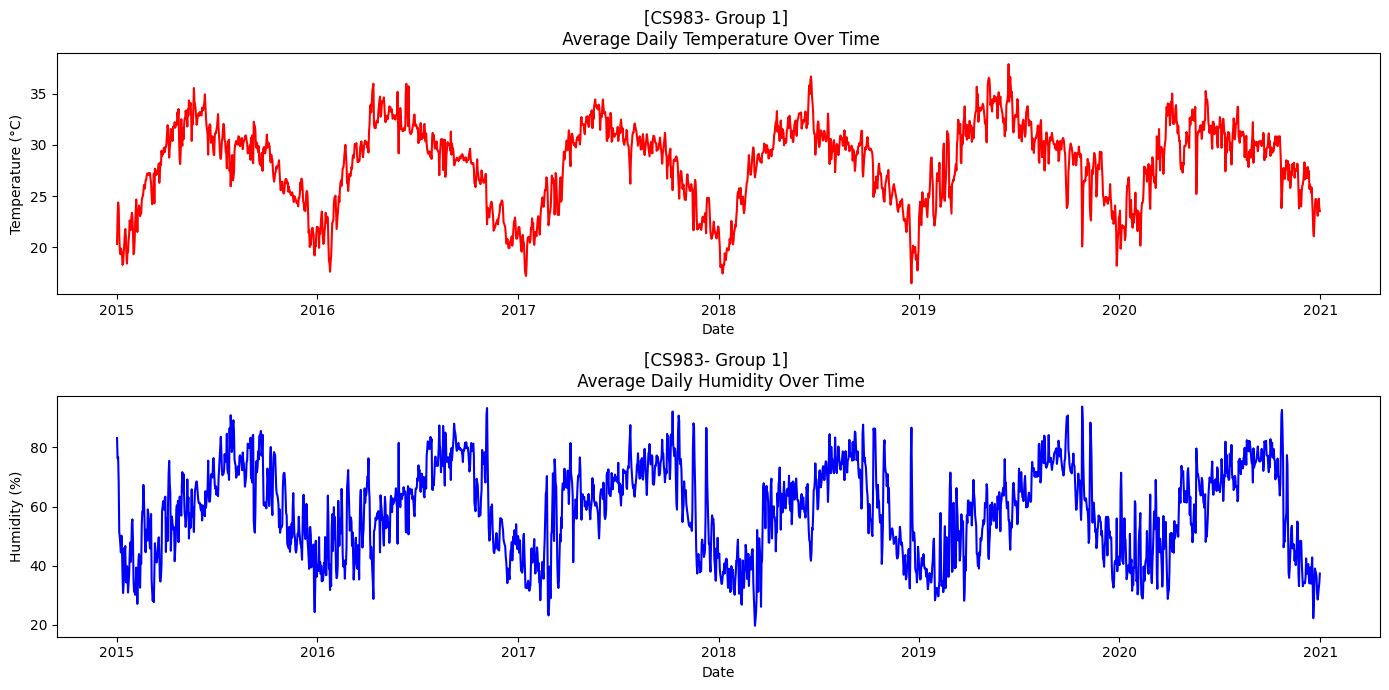

In [12]:
# Plot average daily temperature and humidity over time
plt.figure(figsize=(14, 7))

# Temperature plot
plt.subplot(2, 1, 1)
plt.plot(daily_data['DATE'], daily_data['TEMPERATURE'], color='red')
plt.title('[CS983- Group 1] \n Average Daily Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Humidity plot
plt.subplot(2, 1, 2)
plt.plot(daily_data['DATE'], daily_data['HUMIDITY'], color='blue')
plt.title('[CS983- Group 1] \n Average Daily Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')

plt.tight_layout()
plt.show()

A calendar heatmap, which visualizes data by displaying days of the year in a grid format. Each month is represented horizontally, and days are aligned by weekdays vertically. The color intensity represents the values of interest.

In [25]:
data_heatmap = pd.read_csv(file_path)
# Display the first few rows of the dataset to understand its structure
#data_heatmap.head()
# Convert 'DATETIME' to datetime object and extract date
data_heatmap['DATETIME'] = pd.to_datetime(data_heatmap['DATETIME'])
data_heatmap['DATE'] = data_heatmap['DATETIME'].dt.date

# Group by date and calculate average temperature and humidity
daily_data_heatmap = data_heatmap.groupby('DATE').agg({'TEMPERATURE': 'mean', 'HUMIDITY': 'mean'}).reset_index()

# Apply the classification function to each row
daily_data_heatmap['CLASSIFICATION'] = daily_data_heatmap.apply(classify_day_heatmap, axis=1)
daily_data_heatmap.head()

,DATE,TEMPERATURE,HUMIDITY,CLASSIFICATION
0,2015-01-01,20.333333,83.208333,2
1,2015-01-02,23.041667,76.250000,2
2,2015-01-03,24.375000,76.750000,2
3,2015-01-04,23.916667,68.250000,2
4,2015-01-05,21.250000,51.375000,2


Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int32', name='DATE')


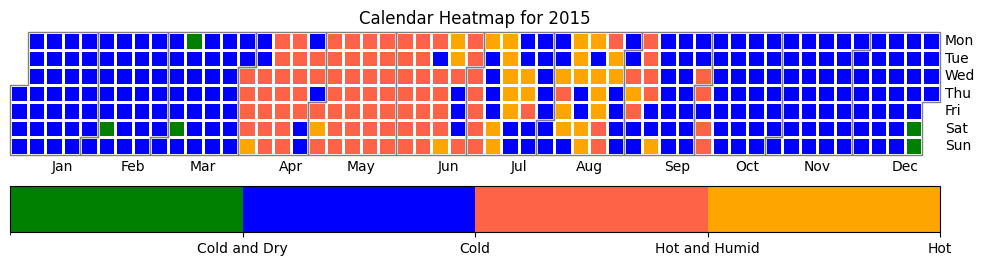

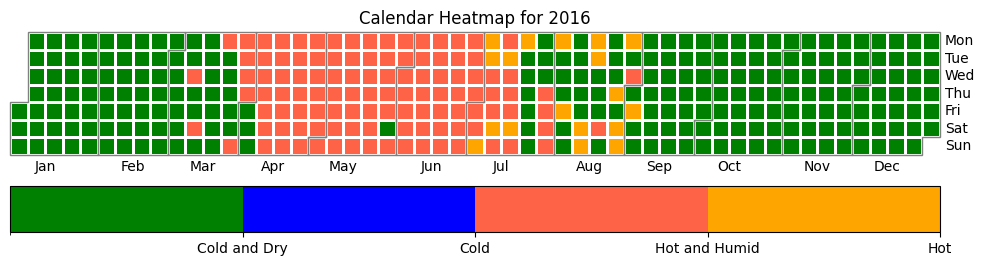

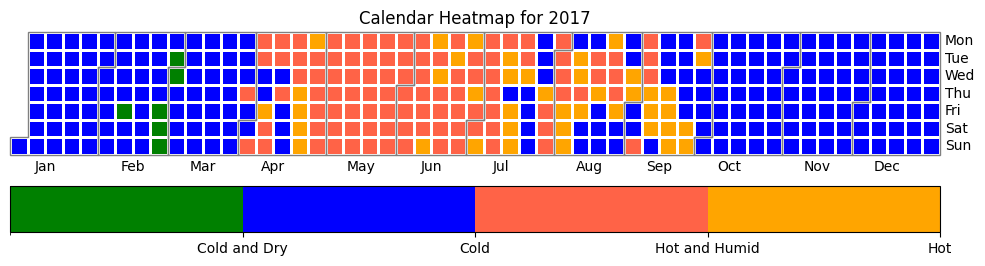

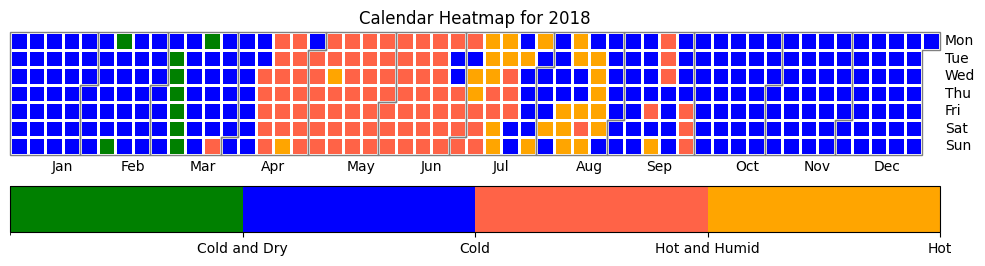

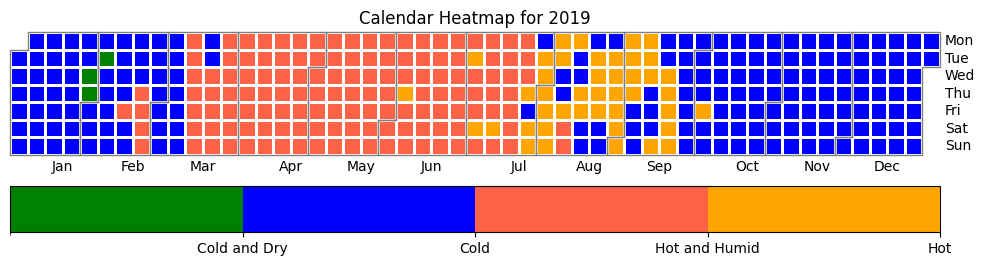

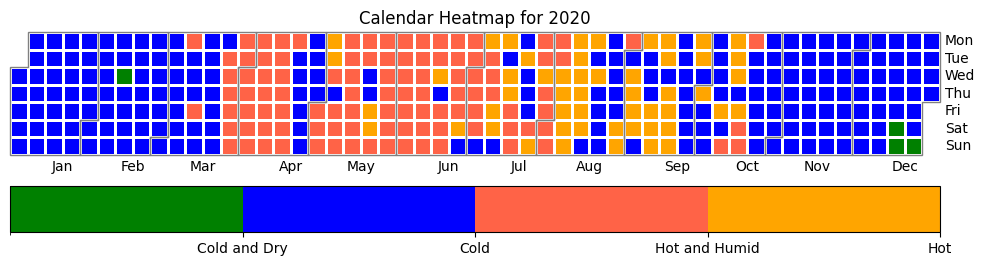

In [26]:
# Define the color map and boundaries
cmap = ListedColormap(['#008000', '#0000FF', '#FF6347', '#FFA500'])  # Green, Blue, Red, Orange
bounds = [0.5, 1.5, 2.5, 3.5, 4.5]  # Boundaries for classification
norm = BoundaryNorm(bounds, cmap.N)

# Ensure the DataFrame has a DatetimeIndex
daily_data_heatmap['DATE'] = pd.to_datetime(daily_data_heatmap['DATE'])
daily_data_heatmap.set_index('DATE', inplace=True)

# Get unique years from the data
years = daily_data_heatmap.index.year.unique()
print(years)
# Plotting for each year
for year in years:
    yearly_data = daily_data_heatmap[daily_data_heatmap.index.year == year]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the calendar heatmap for the current year
    calplot.yearplot(yearly_data['CLASSIFICATION'], cmap=cmap, ax=ax, fillcolor='white')
    
    # Manually create a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_ticks([1.5, 2.5, 3.5, 4.5])
    cbar.set_ticklabels(['Cold and Dry', 'Cold', 'Hot and Humid', 'Hot'])
    
    plt.title(f'Calendar Heatmap for {year}')
    plt.show()